The dataset can be downloaded here:

https://www.kaggle.com/c/dogs-vs-cats/data

In [41]:
import os
import glob
import shutil

from progressbar import ProgressBar
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow import keras

In [36]:
INP_TRAIN_DIR = "data/download/train"
INP_TEST_DIR = "data/download/test1"

DATASET_DIR = "data/dataset_"

MODEL_DIR = "data/models_"

In [8]:
train_dog_files = glob.glob(os.path.join(INP_TRAIN_DIR, "dog*.jpg"))
train_cat_files = glob.glob(os.path.join(INP_TRAIN_DIR, "cat*.jpg"))

np.random.seed(1)
np.random.shuffle(train_dog_files)
np.random.shuffle(train_cat_files)


test_files = glob.glob(os.path.join(INP_TEST_DIR, "*.jpg"))

len(train_dog_files), len(train_cat_files), len(test_files)

(12500, 12500, 12500)

In [9]:
train_dog_files[:5]

['data/download/train/dog.1094.jpg',
 'data/download/train/dog.10705.jpg',
 'data/download/train/dog.784.jpg',
 'data/download/train/dog.669.jpg',
 'data/download/train/dog.1588.jpg']

In [10]:
train_cat_files[:5]

['data/download/train/cat.5044.jpg',
 'data/download/train/cat.6924.jpg',
 'data/download/train/cat.3709.jpg',
 'data/download/train/cat.5157.jpg',
 'data/download/train/cat.9790.jpg']

In [11]:
test_files[:5]

['data/download/test1/10447.jpg',
 'data/download/test1/3337.jpg',
 'data/download/test1/7556.jpg',
 'data/download/test1/5646.jpg',
 'data/download/test1/10264.jpg']

Since the true labels for test set are not available from Kaggle page, we will split the original train set into `train`, `validation` and `test` sets.

In [13]:
TRAIN_SIZE = 20_000
VAL_SIZE = 2500
TEST_SIZE = 2500

TRAIN_SIZE_HALF = TRAIN_SIZE // 2
VAL_SIZE_HALF = VAL_SIZE // 2
TEST_SIZE_HALF = TEST_SIZE // 2

In [14]:
train_dir = os.path.join(DATASET_DIR, "train")
valid_dir = os.path.join(DATASET_DIR, "validation")
test_dir = os.path.join(DATASET_DIR, "test")

train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")
os.makedirs(train_cats_dir, exist_ok=True)
os.makedirs(train_dogs_dir, exist_ok=True)

valid_cats_dir = os.path.join(valid_dir, "cats")
valid_dogs_dir = os.path.join(valid_dir, "dogs")
os.makedirs(valid_cats_dir, exist_ok=True)
os.makedirs(valid_dogs_dir, exist_ok=True)

test_cats_dir = os.path.join(test_dir, "cats")
test_dogs_dir = os.path.join(test_dir, "dogs")
os.makedirs(test_cats_dir, exist_ok=True)
os.makedirs(test_dogs_dir, exist_ok=True)

In [16]:
# copy files for train/dogs and train/cats
for src in train_dog_files[: TRAIN_SIZE_HALF]:
    fname = os.path.basename(src)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
for src in train_cat_files[: TRAIN_SIZE_HALF]:
    fname = os.path.basename(src)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
# copy files for validation/dogs and validation/cats
for src in train_dog_files[TRAIN_SIZE_HALF: TRAIN_SIZE_HALF + VAL_SIZE_HALF]:
    fname = os.path.basename(src)
    dst = os.path.join(valid_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
for src in train_cat_files[TRAIN_SIZE_HALF: TRAIN_SIZE_HALF + VAL_SIZE_HALF]:
    fname = os.path.basename(src)
    dst = os.path.join(valid_cats_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
# copy files for test/dogs and test/cats
for src in train_dog_files[TRAIN_SIZE_HALF + VAL_SIZE_HALF: ]:
    fname = os.path.basename(src)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
for src in train_cat_files[TRAIN_SIZE_HALF + VAL_SIZE_HALF: ]:
    fname = os.path.basename(src)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [20]:
train_files = glob.glob(os.path.join(train_dogs_dir, "*.jpg"))
train_files += glob.glob(os.path.join(train_cats_dir, "*.jpg"))
len(train_files)

20000

In [22]:
# hights and widths
heights = []
widths = []
for fname in train_files:
    img = keras.preprocessing.image.load_img(fname)
    h, w, _ = keras.preprocessing.image.img_to_array(img).shape
    heights.append(h)
    widths.append(w)

In [23]:
np.min(heights), np.max(heights), np.mean(heights), np.median(heights)

(32, 768, 360.46485, 374.0)

In [24]:
np.min(widths), np.max(widths), np.mean(widths), np.median(widths)

(42, 1050, 403.9402, 447.0)

In [25]:
HEIGHT, WIDTH = 360, 400

In [26]:
tf.random.set_seed(42)
np.random.seed(42)

datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

batch_size = 50

train_generator = datagen.flow_from_directory(train_dir, 
                                              target_size=(HEIGHT, WIDTH),
                                              classes=["cats", "dogs"], 
                                              class_mode="binary",
                                              batch_size=batch_size)

valid_generator = datagen.flow_from_directory(valid_dir, 
                                              target_size=(HEIGHT, WIDTH),
                                              classes=["cats", "dogs"], 
                                              class_mode="binary",
                                              batch_size=batch_size)

test_generator = datagen.flow_from_directory(test_dir, 
                                              target_size=(HEIGHT, WIDTH),
                                              classes=["cats", "dogs"], 
                                              class_mode="binary",
                                              batch_size=batch_size)

Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [27]:
example = next(iter(train_generator))

In [29]:
# figures in first batch
example[0].shape

(50, 360, 400, 3)

In [30]:
# labels in first batch
example[1].shape

(50,)

In [31]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

# Model 1

In [34]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(HEIGHT, WIDTH, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(256, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 358, 398, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 179, 199, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 177, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 88, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 96, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 48, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 46, 128)       1

In [35]:
model.compile(loss="binary_crossentropy", 
              optimizer=keras.optimizers.RMSprop(lr=1e-4), 
              metrics=["acc"])

In [40]:
model_file = os.path.join(MODEL_DIR, "dogcat_model_01.h5")

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
#chkp_cb = keras.callbacks.ModelCheckpoint(model_file, save_best_only=True)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=TRAIN_SIZE // batch_size, 
                              epochs=100,
                              validation_data=valid_generator, 
                              validation_steps=VAL_SIZE // batch_size,
                              callbacks=[early_stopping_cb])

model.save(model_file)

Epoch 1/100
400/400 [==============================] - 126s 315ms/step - loss: 0.5619 - acc: 0.7053 - val_loss: 0.5134 - val_acc: 0.7504
Epoch 2/100
400/400 [==============================] - 126s 315ms/step - loss: 0.4830 - acc: 0.7678 - val_loss: 0.4664 - val_acc: 0.7876
Epoch 3/100
400/400 [==============================] - 126s 316ms/step - loss: 0.4290 - acc: 0.7990 - val_loss: 0.4637 - val_acc: 0.7868
Epoch 4/100
400/400 [==============================] - 126s 316ms/step - loss: 0.3925 - acc: 0.8242 - val_loss: 0.4078 - val_acc: 0.8236
Epoch 5/100
400/400 [==============================] - 126s 316ms/step - loss: 0.3598 - acc: 0.8382 - val_loss: 0.3768 - val_acc: 0.8400
Epoch 6/100
400/400 [==============================] - 126s 316ms/step - loss: 0.3345 - acc: 0.8518 - val_loss: 0.3839 - val_acc: 0.8300
Epoch 7/100
400/400 [==============================] - 126s 316ms/step - loss: 0.3072 - acc: 0.8658 - val_loss: 0.3665 - val_acc: 0.8392
Epoch 8/100
400/400 [====================

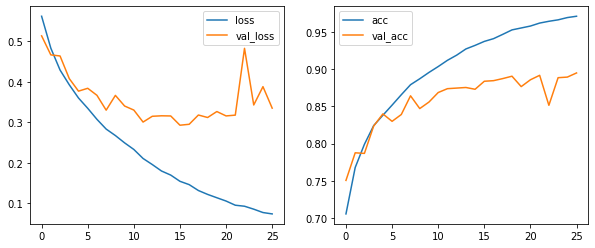

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(history.history["loss"], label="loss")
ax[0].plot(history.history["val_loss"], label="val_loss")
ax[0].legend()

ax[1].plot(history.history["acc"], label="acc")
ax[1].plot(history.history["val_acc"], label="val_acc")
ax[1].legend()

In [46]:
_, acc_train = model.evaluate(train_generator, steps=TRAIN_SIZE // batch_size, verbose=0)
print("Train acc: %0.4f" %acc_train)


_, acc_val = model.evaluate(valid_generator, steps=VAL_SIZE // batch_size, verbose=0)
print("Validation acc: %0.4f" %acc_val)


_, acc_test = model.evaluate(test_generator, steps=TEST_SIZE // batch_size, verbose=0)
print("Test acc: %0.4f" %acc_test)

Train acc: 0.9704
Validation acc: 0.8840
Test acc: 0.8836


# Data augmentation

by random rotation, shifting, shearing and zooming.

In [47]:
tf.random.set_seed(42)
np.random.seed(42)

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                            rotation_range=40,
                                                            width_shift_range=0.2,
                                                            height_shift_range=0.2,
                                                            shear_range=0.2,
                                                            zoom_range=0.2,
                                                            horizontal_flip=True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

batch_size = 50

train_generator = train_datagen.flow_from_directory(train_dir, 
                                              target_size=(HEIGHT, WIDTH),
                                              classes=["cats", "dogs"], 
                                              class_mode="binary",
                                              batch_size=batch_size)

valid_generator = test_datagen.flow_from_directory(valid_dir, 
                                              target_size=(HEIGHT, WIDTH),
                                              classes=["cats", "dogs"], 
                                              class_mode="binary",
                                              batch_size=batch_size)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                              target_size=(HEIGHT, WIDTH),
                                              classes=["cats", "dogs"], 
                                              class_mode="binary",
                                              batch_size=batch_size)

Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [48]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(HEIGHT, WIDTH, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(256, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 358, 398, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 179, 199, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 177, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 88, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 96, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 48, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 46, 128)       1

In [ ]:
model.compile(loss="binary_crossentropy", 
              optimizer=keras.optimizers.RMSprop(lr=1e-4), 
              metrics=["acc"])


